<a href="https://colab.research.google.com/github/Devika2605/Opencv_tensorflow/blob/main/bostonhousingdataset_tensorflowmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [ ]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [ ]:
boston_features = {
    "Average Number of Rooms": 5,
}

X_train_1d = X_train[:, boston_features["Average Number of Rooms"]]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features["Average Number of Rooms"]]

(404,)


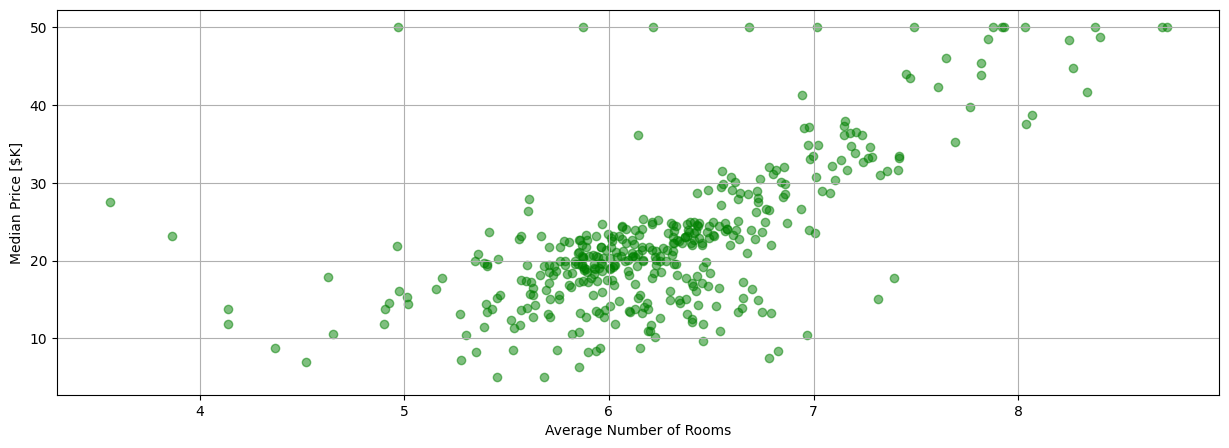

In [ ]:
plt.figure(figsize=(15, 5))

plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Price [$K]")
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color="green", alpha=0.5)

In [ ]:
model = Sequential()

# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))

# Display a summary of the model architecture.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")


In [ ]:
history = model.fit(
    X_train_1d,
    y_train,
    batch_size=16,
    epochs=101,
    validation_split=0.3,
)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 251.1139 - val_loss: 332.5994
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 229.0343 - val_loss: 312.1377
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 212.4202 - val_loss: 293.1743
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 196.9818 - val_loss: 275.1405
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 182.4024 - val_loss: 257.9567
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 168.6358 - val_loss: 241.6097
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 155.6726 - val_loss: 226.0963
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 143.5087 - val_loss: 211.4144
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 132.1403 - val_loss: 197.5620
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 121.5631 - val_loss: 184.5367
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 111.7721 - val_loss: 172.3360
Epoch 12/101
18/18

In [ ]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

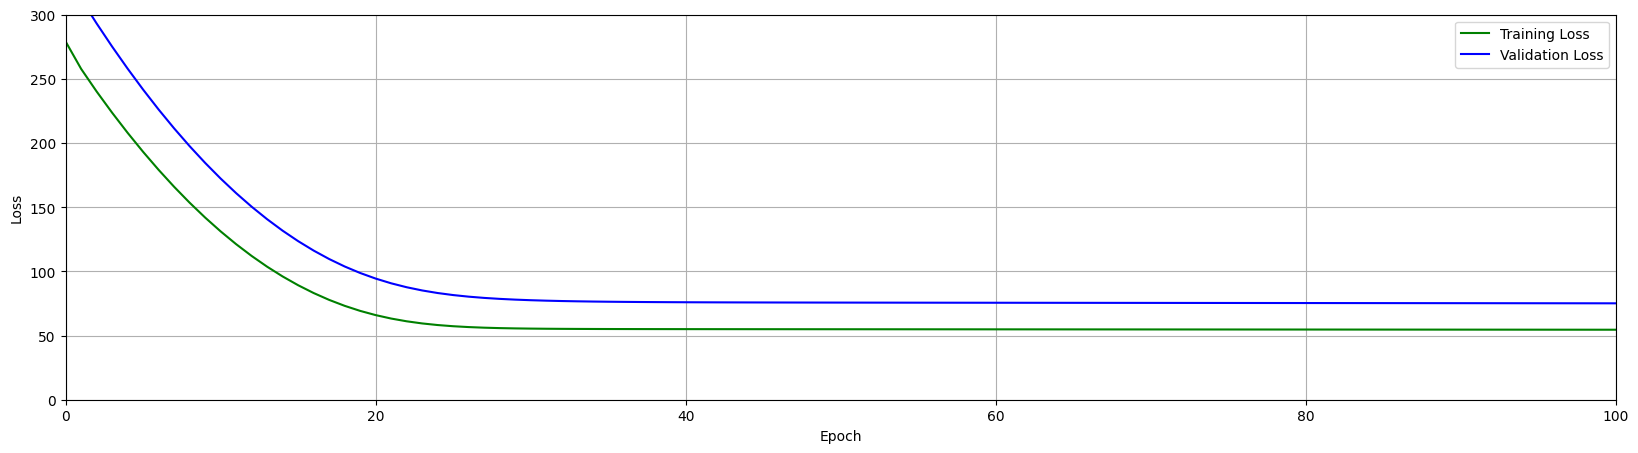

In [ ]:
plot_loss(history)

In [ ]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = np.array([3, 4, 5, 6, 7])
y_pred = model.predict(x)
for idx in range(len(x)):
    predicted_price = y_pred[idx].item()
    print(f"Predicted price of a home with {x[idx]} rooms: ${int(predicted_price * 10) / 10}K")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted price of a home with 3 rooms: $11.3K
Predicted price of a home with 4 rooms: $14.6K
Predicted price of a home with 5 rooms: $18.0K
Predicted price of a home with 6 rooms: $21.3K
Predicted price of a home with 7 rooms: $24.6K


In [ ]:
# Generate feature data that spans the range of interest for the independent variable.
x = np.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [ ]:
def plot_data(x_data, y_data, x, y, title=None):

    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

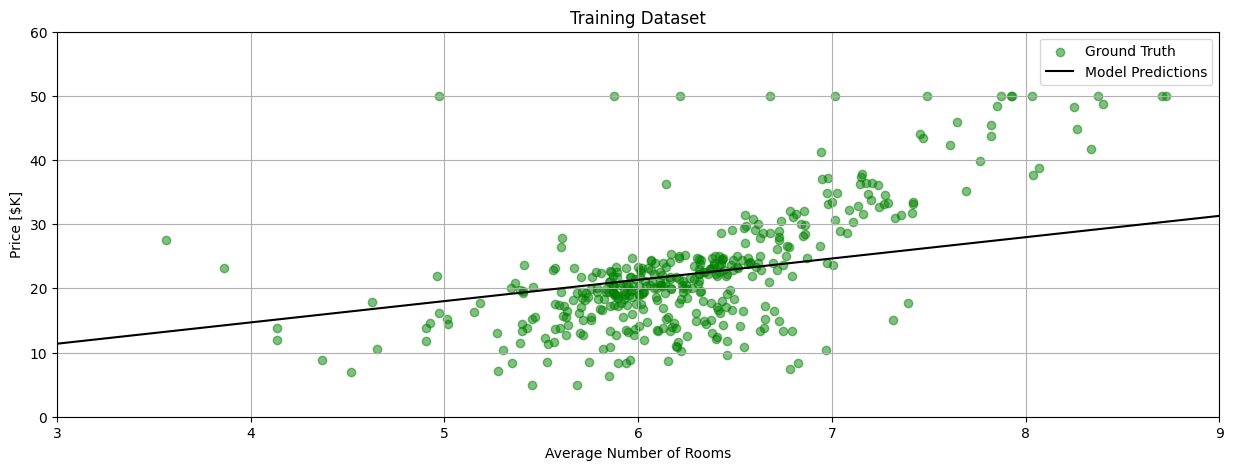

In [ ]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

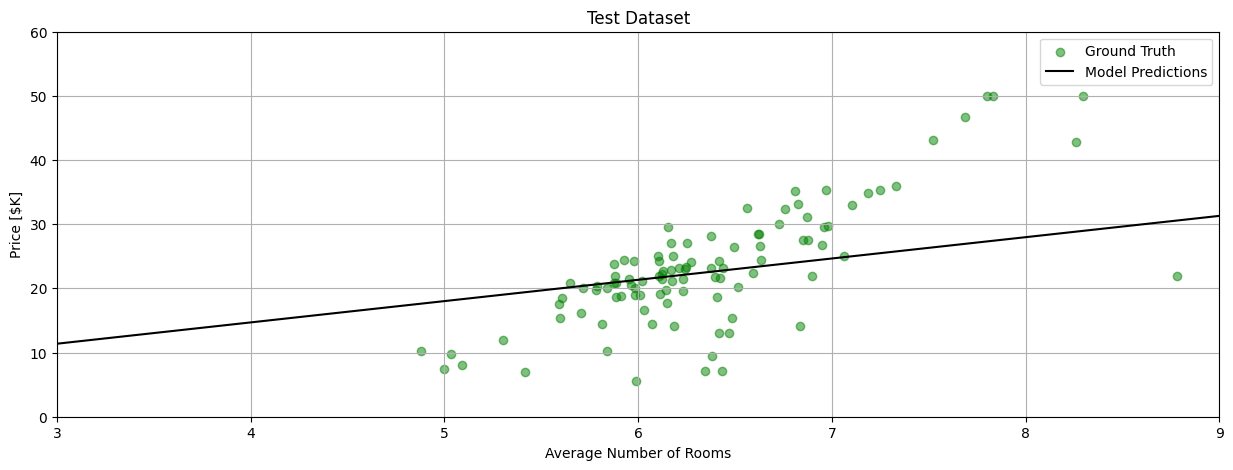

In [ ]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')